In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import tensorflow as tf
import numpy as np
import os
import gzip
from io import BytesIO
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd

# Memuat data MNIST dari file lokal
def load_mnist_images(file_path):
    """Membaca file gambar MNIST dari format binary."""
    with gzip.open(file_path, 'rb') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        num_images = int.from_bytes(f.read(4), 'big')
        rows = int.from_bytes(f.read(4), 'big')
        cols = int.from_bytes(f.read(4), 'big')
        buffer = f.read()
        data = np.frombuffer(buffer, dtype=np.uint8)
        data = data.reshape(num_images, rows, cols, 1)  # Tambahkan channel untuk grayscale
        return data / 255.0  # Normalisasi ke [0, 1]

def load_mnist_labels(file_path):
    """Membaca file label MNIST dari format binary."""
    with gzip.open(file_path, 'rb') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        num_labels = int.from_bytes(f.read(4), 'big')
        buffer = f.read()
        labels = np.frombuffer(buffer, dtype=np.uint8)
        return labels

# Path ke folder dataset
train_dir = "/content/drive/My Drive/aksaraZIP_18/train"
test_dir = "/content/drive/My Drive/aksaraZIP_18/test"

# Muat data training dan testing
train_images = load_mnist_images(f"{train_dir}/train-images-idx3-ubyte.gz")
train_labels = load_mnist_labels(f"{train_dir}/train-labels-idx1-ubyte.gz")

test_images = load_mnist_images(f"{test_dir}/t10k-images-idx3-ubyte.gz")
test_labels = load_mnist_labels(f"{test_dir}/t10k-labels-idx1-ubyte.gz")

# Verifikasi bentuk data
print("Train Images Shape:", train_images.shape)  # (60000, 28, 28, 1)
print("Train Labels Shape:", train_labels.shape)  # (60000,)
print("Test Images Shape:", test_images.shape)    # (10000, 28, 28, 1)
print("Test Labels Shape:", test_labels.shape)    # (10000,)

Train Images Shape: (720, 28, 28, 1)
Train Labels Shape: (720,)
Test Images Shape: (180, 28, 28, 1)
Test Labels Shape: (180,)


In [30]:

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(18, activation='softmax')
        ])
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model




Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 11, 11, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          51,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 18)                  │           2,322 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,898 (214.45 KB)

 Trainable params: 54,898 (214.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1084 - loss: 2.8195 - val_accuracy: 0.3778 - val_loss: 2.5060
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5051 - loss: 2.2035 - val_accuracy: 0.6722 - val_loss: 1.4630
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6701 - loss: 1.2619 - val_accuracy: 0.7833 - val_loss: 0.7808
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8301 - loss: 0.6998 - val_accuracy: 0.8500 - val_loss: 0.5904
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8827 - loss: 0.4618 - val_accuracy: 0.8889 - val_loss: 0.4244
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9159 - loss: 0.3416 - val_accuracy: 0.9222 - val_loss: 0.3177
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9211 - loss: 0.2397 - val_accuracy: 0.9444 - val_loss: 0.2540
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9671 - loss: 0.1704 - val_accuracy: 0.9389 - v

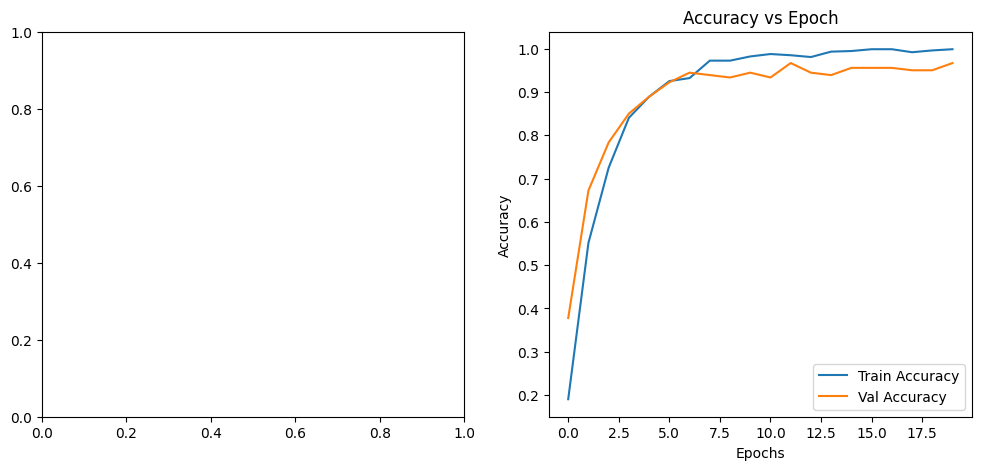

In [31]:
def train_model(model, train_images, train_labels, test_images, test_labels):
    history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))
    plot_training_graphs(history)
    return history

def plot_training_graphs(history):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[1].plot(history.history['accuracy'], label='Train Accuracy')
    axes[1].plot(history.history['val_accuracy'], label='Val Accuracy')
    axes[1].set_title('Accuracy vs Epoch')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()

    plt.show()

# Membuat dan melatih model
model = create_model()
history = train_model(model, train_images, train_labels, test_images, test_labels)

In [36]:
uploader = widgets.FileUpload(accept="image/*", multiple=True)
display(uploader)
out = widgets.Output()
display(out)

# Function to make predictions
def file_predict(filename, file, out):
    """A function for creating the prediction and printing the output."""
    image = tf.keras.utils.load_img(file, target_size=(28, 28))
    image = tf.keras.utils.img_to_array(image)
    image = tf.image.rgb_to_grayscale(image)  # Convert to grayscale
    image = image / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image, verbose=0)[0]

    # Sort and get the top 3 predictions
    top_indices = np.argsort(prediction)[-3:][::-1]  # Get indices of top 3 classes
    top_percentages = prediction[top_indices] * 100  # Convert probabilities to percentages

    label_map = {
        0: 'A', 1: 'BA', 2: 'CA', 3: 'DA', 4: 'GA', 5: 'JA', 6: 'KA', 7: 'LA', 8: 'MA', 9: 'NA',
        10: 'NGA', 11: 'NYA', 12: 'PA', 13: 'RA', 14: 'SA', 15: 'TA', 16: 'WA', 17: 'YA'
    }

    print("Top 3 Predictions:")
    for i in range(3):
        label = label_map[top_indices[i]]  # Dapatkan label dari angka
        print(f"{i+1}. {label}: {top_percentages[i] :.2f}%")

    return top_indices, top_percentages

# Function to handle file uploads
def on_upload_change(change):
    """A function to handle uploaded files and run predictions."""
    for filename, file_info in change.new.items():  # Access filename and file data
        file_content = BytesIO(file_info['content'])  # Get file content as BytesIO
        file_predict(filename, file_content, out)

# Attach the observer
uploader.observe(on_upload_change, names='value')

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

Output()

Top 3 Predictions:
1. NGA: 99.08%
2. NA: 0.43%
3. JA: 0.42%


In [41]:
# Simpan model sebagai SavedModel
model.save("saved_model.keras")



In [46]:
from tensorflow.keras.models import load_model

# Muat kembali model dari file HDF5
model = load_model("saved_model.keras")


In [48]:
# Simpan arsitektur model ke JSON
model_json = model.to_json()
with open("model_name.json", "w") as json_file:
    json_file.write(model_json)

# Simpan bobot model secara terpisah
model.save_weights("model_aksara.weights.h5")


In [50]:
from google.colab import files
files.download("model_name.json")

# Unduh file H5
files.download("model_aksara.weights.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>